In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

def generate_datasets(selectedNoise, nClusters):
    from sklearn.datasets import make_blobs
    X_blobs, _ = make_blobs(n_samples=1000, centers=nClusters, cluster_std=selectedNoise, random_state=0)
    return X_blobs

from sklearn.metrics import pairwise_distances_argmin_min

def ctvn_clustering(S, k, theta, iterMax, nClusters):
    # Ejecutar K-means con k clusters
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10, max_iter=iterMax).fit(S)
    Q = kmeans.cluster_centers_

    # Construir el diagrama de Voronoi sobre Q
    vor = Voronoi(Q)
    P = vor.vertices

    # Establecer todos los centros de Q como no visitados
    visited = np.zeros(len(Q), dtype=bool)

    # Ordenar los vértices de P por el eje X
    P_sorted = P[np.argsort(P[:, 0])]

    clusters = [-1] * len(Q)
    current_cluster = 1

    # Iterar sobre los vértices de P
    for i in range(len(P_sorted)):
        print(current_cluster)
        vertex = P_sorted[i]

        # Construir el mayor círculo vacío para P[i]
        dist = np.linalg.norm(Q - vertex, axis=1)
        closest_centers = np.where(dist < theta)[0]

        if len(closest_centers) > 0:
            if np.any(visited[closest_centers]):
                min_cluster_id = -1;
                # Asignar los centros al c más pequeño
                assigned_cluster = min([clusters[idx] for idx in closest_centers if clusters[idx] != -1])
                for idx in closest_centers:
                    clusters[idx] = assigned_cluster
            else:
                # Asignar los centros a c
                for idx in closest_centers:
                    clusters[idx] = current_cluster
                #print(f"Assigning cluster ID {current_cluster} to centers {closest_centers}")
            current_cluster +=1

            # Establecer los centros que están en el círculo como visitados
            visited[closest_centers] = True

    return clusters, Q, vor, kmeans.labels_


def CalculateMSE(X, labels, centroids):
    return np.sum((X - centroids[labels])**2) / X.shape[0]

Assigning cluster ID 0 to centers [ 5 11 29]
Assigning cluster ID 1 to centers [ 1 16 26 27]
MSE CTVN: 0.4939000108275108
MSE K-means: 0.6362823602807314


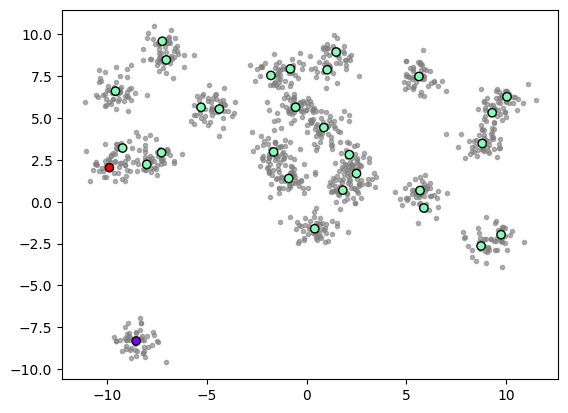

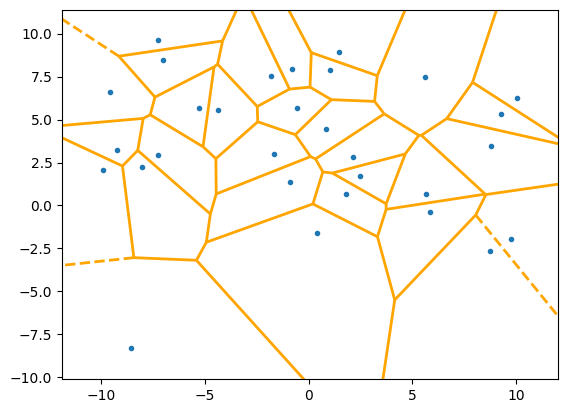

In [ ]:

# Ejemplo de uso
iterMax = 300
selectedNoise = 0.60
nClusters = 20
S = generate_datasets(selectedNoise, nClusters)
theta = 3
k = 30

clusters, Q, vor, labels = ctvn_clustering(S, k, theta, iterMax, nClusters)

mse = CalculateMSE(S, labels, Q)
print("MSE CTVN:", mse)

kmeans = KMeans(n_clusters=nClusters, random_state=0, n_init = 10, max_iter = iterMax).fit(S)
mse_kmeans = CalculateMSE(S, kmeans.labels_, kmeans.cluster_centers_)
print("MSE K-means:", mse_kmeans)

# Visualización de los resultados
plt.scatter(S[:, 0], S[:, 1], c='gray', alpha=0.6, marker='.')
plt.scatter(Q[:, 0], Q[:, 1], c=clusters, cmap='rainbow', edgecolor='black')
voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=2)
plt.show()


In [ ]:
def plot_mse_vs_k(S, k_values, theta, iterMax, nClusters):
    mse_ctvn = []
    mse_kmeans = []

    for k in k_values:
        clusters, Q, vor, labels = ctvn_clustering(S, k, theta, iterMax, nClusters=nClusters)
        mse_ctvn.append(CalculateMSE(S, labels, Q))

        kmeans = KMeans(n_clusters=nClusters, random_state=0, n_init=10, max_iter=iterMax).fit(S)
        mse_kmeans.append(CalculateMSE(S, kmeans.labels_, kmeans.cluster_centers_))

    plt.figure(figsize=(10, 6))
    plt.plot(k_values, mse_ctvn, label='CTVN MSE', marker='o')
    plt.plot(k_values, mse_kmeans, label='K-means MSE', marker='o')
    plt.xlabel('K')
    plt.ylabel('MSE')
    plt.title('MSE vs Número de subclusters')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
def plot_mse_vs_nclusters(S, nClusters_values, theta, iterMax):
    mse_ctvn = []
    mse_kmeans = []

    for nClusters in nClusters_values:
        S = generate_datasets(selectedNoise, nClusters)
        k = 2*nClusters
        clusters, Q, vor, labels = ctvn_clustering(S, k, theta, iterMax, nClusters)
        mse_ctvn.append(CalculateMSE(S, labels, Q))

        kmeans = KMeans(n_clusters=nClusters, random_state=0, n_init=10, max_iter=iterMax).fit(S)
        mse_kmeans.append(CalculateMSE(S, kmeans.labels_, kmeans.cluster_centers_))

    plt.figure(figsize=(10, 6))
    plt.plot(nClusters_values, mse_ctvn, label='CTVN MSE', marker='o')
    plt.plot(nClusters_values, mse_kmeans, label='K-means MSE', marker='o')
    plt.xlabel('nClusters')
    plt.ylabel('MSE')
    plt.title('MSE vs Número de clusters')
    plt.legend()
    plt.grid(True)
    plt.show()


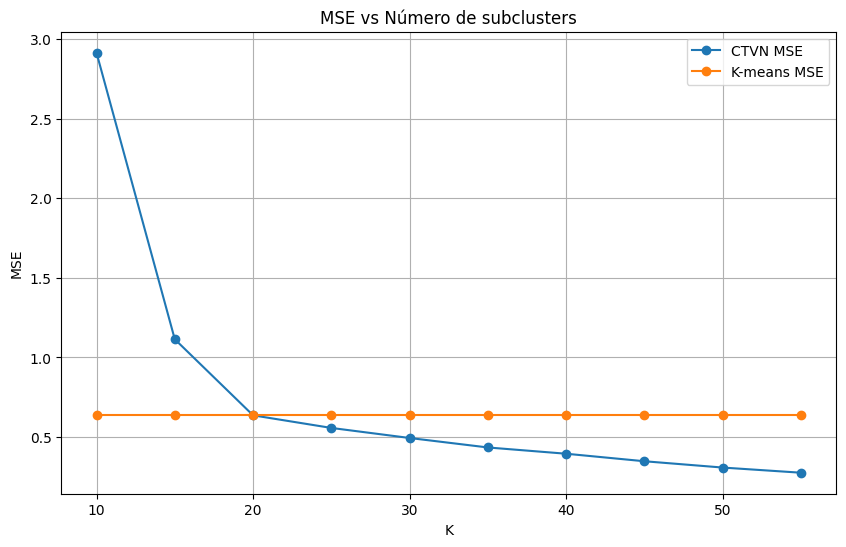

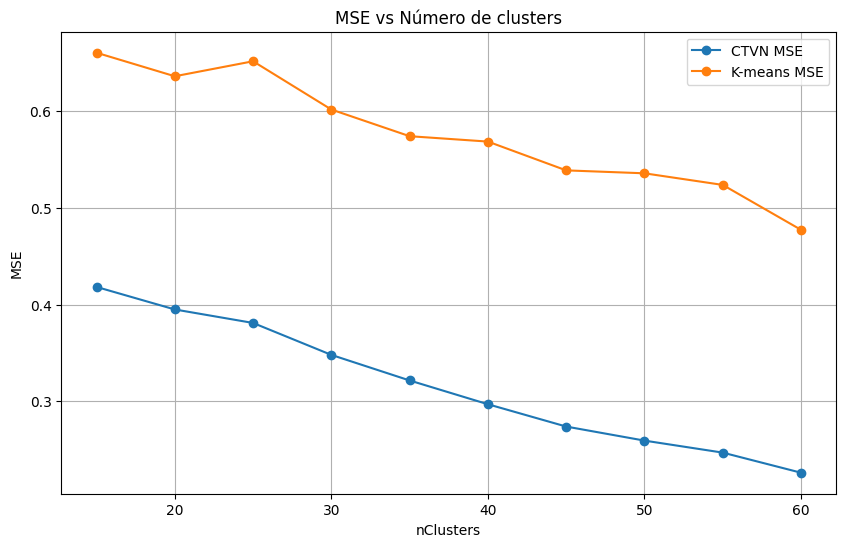

In [ ]:
# Parámetros iniciales
iterMax = 300
selectedNoise = 0.60
theta = 0.5

nClusters = 20
S = generate_datasets(selectedNoise, nClusters)

# Análisis MSE vs k
k_values = range(nClusters-10, 3*nClusters, 5)
plot_mse_vs_k(S, k_values, theta, iterMax, nClusters)

# Análisis MSE vs nClusters
nClusters_values = range(nClusters-5, nClusters+45, 5)
plot_mse_vs_nclusters(S, nClusters_values, theta, iterMax)


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


<ipython-input-241-225b337a602b>:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_result], ignore_index=True)


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
4
5
6
7
8
8
8
8
1
1
2
3
4
5
6
7
8
8
8
8
1
1
2
3
4
5
6
7
8
8
8
8
1
1
2
3
4
5
6
7
8
8
8
8
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
3
3
3
3
3
3
1
1
1
1
2
2
3
3
3
3
3
3
1
1
1
1
2
2
3
3
3
3
3
3
3
1
1
1
1
2
2
3
3
3
3
3
3
3
1
1
2
3
4
5
6
7
7
7
7
7
1
1
2
3
4
5
6
7
7
7
7
7
1
1
1
2
3
4
5
6
6
6
6
6
6
1
1
1
2
3
4
5
6
6
6
6
6
6
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
3
3
4
4
4
4
4
4
1
1
1
1
2
3
3
3
3
3
3
3
3
1
1
1
2
3
4
4
4
4
4
4
4
4
1
1
1
2
3
4
4
4
4
4
4
4
4
1
1
1
2
3
4
5
6
7
7
8
8


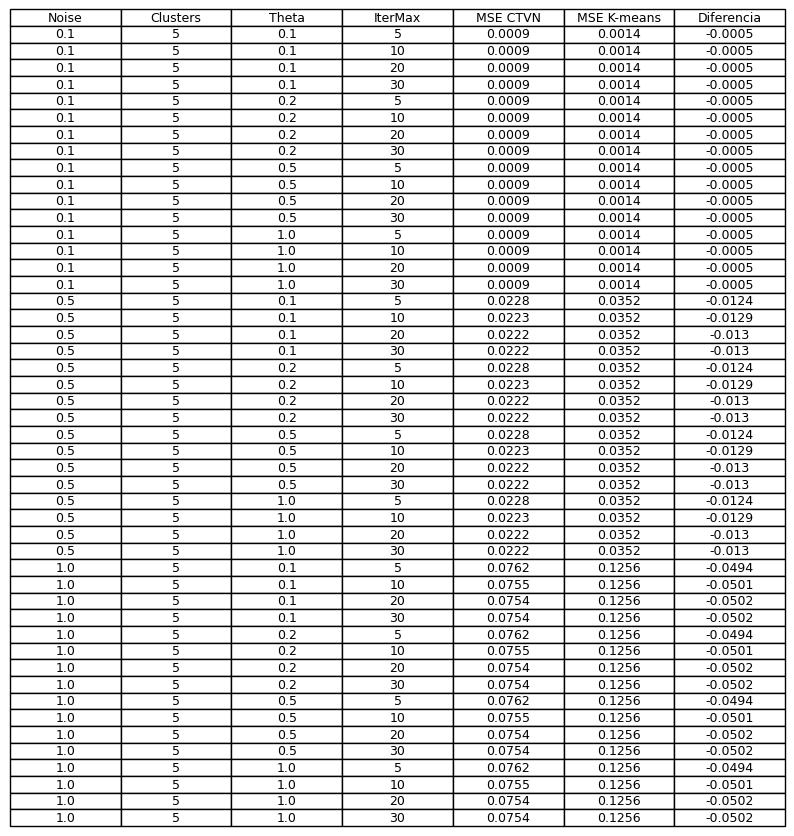

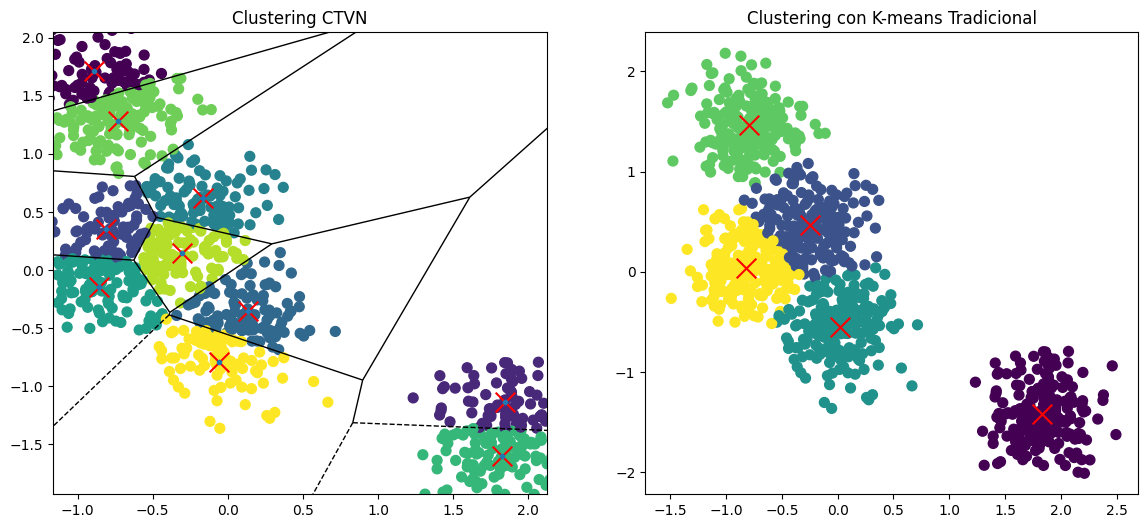

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Parámetros del experimento
noise_levels = [0.1, 0.5, 1.0]
cluster_counts = [5]
theta_values = [0.1, 0.2, 0.5, 1]
iterMax_values = [5, 10, 20, 30]

# Resultados almacenados en un DataFrame
results = pd.DataFrame(columns=['Noise', 'Clusters', 'Theta', 'IterMax', 'MSE CTVN', 'MSE K-means', 'Diferencia'])

# Realizar experimentos con diferentes configuraciones
for noise in noise_levels:
    for n_clusters in cluster_counts:
        for theta in theta_values:
            for iterMax in iterMax_values:
                # Generar dataset
                X = generate_datasets(noise, n_clusters)
                X = StandardScaler().fit_transform(X)

                # Ejecutar CTVN
                labels_ctvn, centroids_ctvn, voronoi_ctvn, kmeans_labels_ctvn = ctvn_clustering(X, 2*n_clusters, theta, iterMax, n_clusters)

                # Ejecutar K-means estándar
                kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=iterMax, random_state=0).fit(X)
                centroids_kmeans = kmeans.cluster_centers_
                labels_kmeans = kmeans.labels_

                # Calcular MSE para ambos métodos
                mse_ctvn = CalculateMSE(X, kmeans_labels_ctvn, centroids_ctvn)
                mse_kmeans = CalculateMSE(X, labels_kmeans, centroids_kmeans)

                # Crear un nuevo DataFrame con los resultados actuales
                new_result = pd.DataFrame({
                    'Noise': [noise],
                    'Clusters': [n_clusters],
                    'Theta': [theta],
                    'IterMax': [iterMax],
                    'MSE CTVN': [round(mse_ctvn, 4)],
                    'MSE K-means': [round(mse_kmeans, 4)],
                    'Diferencia': [round(mse_ctvn - mse_kmeans, 4)]
                })

                # Concatenar con el DataFrame de resultados
                results = pd.concat([results, new_result], ignore_index=True)

# Mostrar resultados
plt.figure(figsize=(10, 6))
plt.table(cellText=results.values, colLabels=results.columns, loc='center', cellLoc='center')
plt.axis('off')
plt.show()

# Graficar ejemplos de Voronoi y K-means
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
voronoi_plot_2d(voronoi_ctvn, ax=axs[0], show_vertices=False)
axs[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels_ctvn, cmap='viridis', s=50)
axs[0].scatter(centroids_ctvn[:, 0], centroids_ctvn[:, 1], c='red', s=200, marker='x')
axs[0].set_title("Clustering CTVN")

axs[1].scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis', s=50)
axs[1].scatter(centroids_kmeans[:, 0], centroids_kmeans[:, 1], c='red', s=200, marker='x')
axs[1].set_title("Clustering con K-means Tradicional")

plt.show()
